<a href="https://colab.research.google.com/github/jrchac/Exploratory-Data-Analysis/blob/main/EDA_Fitbit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Big Data

## Description of the Project

Project: FitBit Activity-Sleep Analysis

Data Set: FitBit Fitness Tracker Data

Source: https://www.kaggle.com/datasets/arashnic/fitbit?select=mturkfitbit_export_4.12.16-5.12.16

Main Objective: Exploratory Data Analysis (EDA) of the FitBit Tracker Data regarding daily activity and sleep patterns.

Exploratory analysis:
- how are physical activity and sleep duration distributed across all users?
- what are the patterns in the relationship between minutes spent in a certain state and sleep duration?
-  how do metrics of physical activity and sleep relate to each other? (correlation)

Specific Questions, we would like to answer based on data:
1. Does the time of day when a user takes the most amount of steps influence sleep duration?
2. Which measures of a user's physical activity influence sleep duration?
3. How accurately can sleep duration be predicted based on measurements of a user's physical activity?


## Exploratory Data Analysis


### General Data Analysis
The first step of the project is to analyze the dataset. The following points help us understand the data:
- short description of the datasets (Daily Activity, Sleep Day and Hourly Steps)
- number of unique users,
- missing values in any feature column, and
- duplicate rows
- visualization of features

In [1]:
# Dataset preprocessing
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Importing data sets
daily_activity = pd.read_csv('dailyActivity_merged.csv')
sleep_day = pd.read_csv('sleepDay_merged.csv')
hourly_steps = pd.read_csv("hourlySteps_merged.csv")


We check for the number of unique IDs in the three datasets:

In [3]:
print("Number of users in daily activity dataset:",daily_activity['Id'].nunique())
print("Number of users in houtly steps dataset:",hourly_steps['Id'].nunique())
print("Number of users in sleep day dataset:",sleep_day['Id'].nunique())


Number of users in daily activity dataset: 33
Number of users in houtly steps dataset: 33
Number of users in sleep day dataset: 24


Then, we check for missing values:

In [4]:
missing_values = daily_activity.isnull().sum()
print("missing values in daily activity dataset:",missing_values.sum())

missing_values = sleep_day.isnull().sum()
print("missing values in sleep day dataset:", missing_values.sum())

missing_values = hourly_steps.isnull().sum()
print("missing values in hourly steps dataset:", missing_values.sum())
print("no missing values found")

missing values in daily activity dataset: 0
missing values in sleep day dataset: 0
missing values in hourly steps dataset: 0
no missing values found


These are the number of duplicate values in each feature of each data set. Again, only <code>sleep_day</code> contains duplicate values, which are promptly removed.

In [5]:
num_duplicated_1 = daily_activity.duplicated().sum()
print ("Number of duplicates in daily_activity:", num_duplicated_1)

num_duplicated_3 = hourly_steps.duplicated().sum()
print ("Number of duplicates in hourly_steps:", num_duplicated_3)

num_duplicated_2 = sleep_day.duplicated().sum()
print ("Number of duplicates in sleep_day:", num_duplicated_2)
sleep_day = sleep_day.drop_duplicates()


Number of duplicates in daily_activity: 0
Number of duplicates in hourly_steps: 0
Number of duplicates in sleep_day: 3


### Exploring User Activity and Sleep Patterns

First, the variable <code>TotalActiveMinutes</code> is created to measure all kinds of activity. The mean value of this variable, alongside the sleep duration, were calculated per user ID to be used in a bar plot.

In [6]:
daily_activity["TotalActiveMinutes"] = daily_activity["LightlyActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["VeryActiveMinutes"]
daily_ac_user = daily_activity.groupby(["Id"])["TotalActiveMinutes"].mean()
daily_ac_user = daily_ac_user.reset_index()
daily_ac_user = daily_ac_user.sort_values(by = ["TotalActiveMinutes"], ascending = False)

daily_sl_user = sleep_day.groupby(["Id"])["TotalMinutesAsleep"].mean()
daily_sl_user = daily_sl_user.reset_index()
daily_sl_user = daily_sl_user.sort_values(by = ["TotalMinutesAsleep"], ascending = False)

# Merging activity variables with sleep variables
daily_user = pd.merge(daily_ac_user, daily_sl_user, on = ['Id'], how = 'left')
daily_user = pd.melt(daily_user, id_vars = "Id", value_vars = ["TotalActiveMinutes", "TotalMinutesAsleep"])


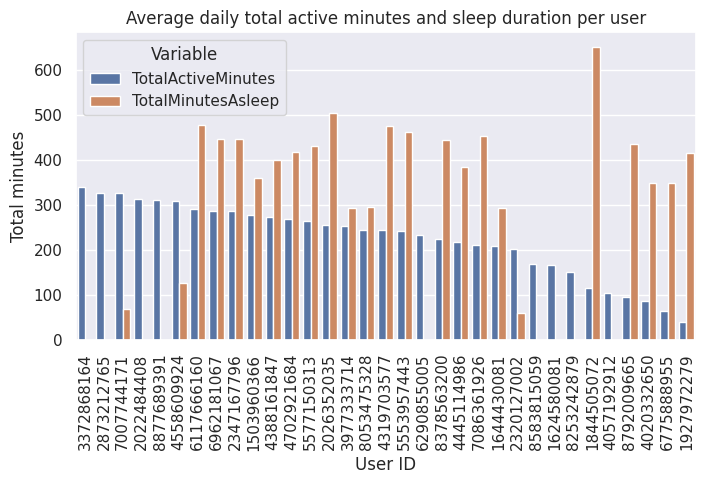

In [7]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style("darkgrid")

sns.barplot(data = daily_user, x = daily_user["Id"], y = daily_user["value"], hue = daily_user["variable"],
            order = daily_ac_user.sort_values("TotalActiveMinutes", ascending = False).Id).set(
            title = "Average daily total active minutes and sleep duration per user",
            xlabel = "User ID", ylabel = "Total minutes")

plt.xticks(rotation = 90)
plt.legend(title = "Variable", loc = "upper left")
plt.show()


**Conclusion**: Most of the values seem to make sense, except for the low average sleeping time of three users:
- 2320127002
- 4558609924
- 7007744171

The sleep measurements belonging to these users will be removed when the subquestions are considered.

- sleep activity has some null values
- sleep activity

### Boxplot: Daily activity and sleep duration

In this case, all measurements of daily activity and the sleep duration are considered individually, resulting in the box plot below.

In [8]:
ac_sl_merged = pd.merge(daily_activity, sleep_day, on = ['Id'], how = 'left')
ac_sl_merged = pd.melt(ac_sl_merged, id_vars = "Id", value_vars = ["TotalActiveMinutes", "TotalMinutesAsleep"])

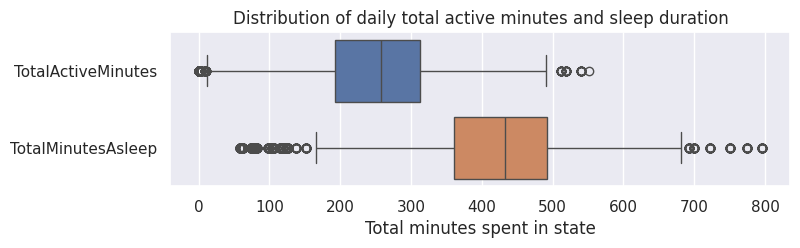

In [9]:
sns.set(rc={"figure.figsize":(8, 2)})
sns.set_style("darkgrid")

sns.boxplot(data = ac_sl_merged, x = ac_sl_merged["value"], y = ac_sl_merged["variable"],
            hue = ac_sl_merged["variable"]).set(title = "Distribution of daily total active minutes and sleep duration",
            xlabel = "Total minutes spent in state", ylabel = "")

# Hiding the legend
plt.legend([],[], frameon = False)


**Conclusion**: None of the values seem unrealistic on their own, so no observations have to be removed.

### Unraveling Peak Step Counts Amoung Users Across the Week

Based on the date of the measurement, the day of the week was extracted from <code>daily_activity</code>. The mean of each day of the week was subsequently used to make a bar plot.

In [10]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
daily_activity["Weekday"] = daily_activity["ActivityDate"].dt.day_name()

mean_daily_steps = daily_activity.groupby(["Weekday"]).mean()
mean_daily_steps = mean_daily_steps.reset_index()

# Manually sort days in right order
mean_daily_steps = mean_daily_steps.reindex([1, 5, 6, 4, 0, 2, 3])

<ipython-input-10-0e96a8f221f9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_daily_steps = daily_activity.groupby(["Weekday"]).mean()


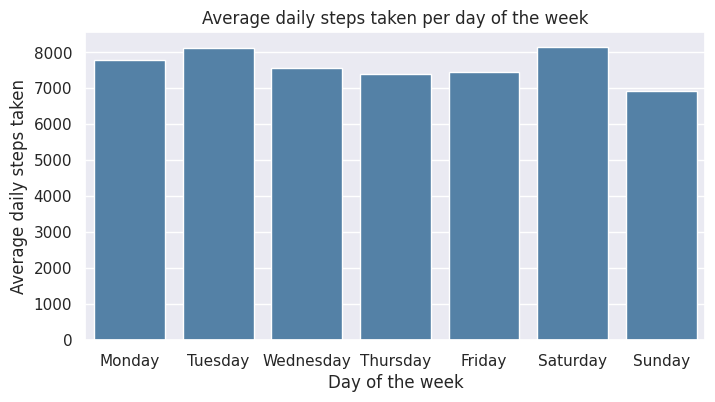

In [11]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style("darkgrid")

sns.barplot(data = mean_daily_steps, x = mean_daily_steps["Weekday"], y = mean_daily_steps["TotalSteps"],
            color= "steelblue").set(title = "Average daily steps taken per day of the week",
            xlabel = "Day of the week", ylabel = "Average daily steps taken")
plt.show()

**Conclusion**: Notable values seem to be Tuesday, Saturday and Sunday. It's not apparent why a peak occurs on Tuesday. Saturday and Sunday are likely caused by the lack of obligations, such as education or work.

### Exploring Peak Activity Hours Among Individuals

Based on the date and hour of the measurement, the hour of the day was extracted from <code>daily_activity</code>. The mean of each hour of the day was subsequently used to make a line plot.

In [12]:
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"])
hourly_steps["Hour"] = hourly_steps["ActivityHour"].dt.hour

average_steps_ph = hourly_steps.groupby(["Hour"]).mean()
average_steps_ph = average_steps_ph.reset_index()


<ipython-input-12-a96d3093fc00>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_steps_ph = hourly_steps.groupby(["Hour"]).mean()


[Text(0.5, 1.0, 'Average hourly steps taken per hour'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Average hourly steps taken')]

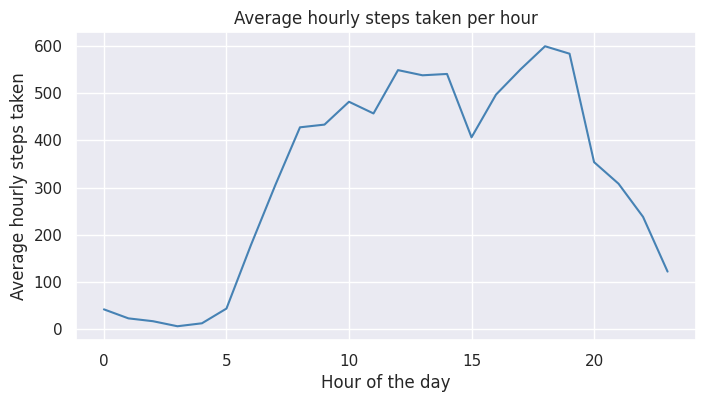

In [13]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style("darkgrid")

sns.lineplot(data = average_steps_ph, x = average_steps_ph["Hour"], y = average_steps_ph["StepTotal"],
             color = "steelblue").set(title = "Average hourly steps taken per hour",
             xlabel = "Hour of the day", ylabel = "Average hourly steps taken")


**Conclusion**: Peaks occur around 1 PM and around 6 PM. Again, this is likely related to education or work, as they correspond to the times at which usually take a break or head back home.

### Correlation matrix of the activity and sleep dataset combined

The first step is to make sure that the data sets of physical activity and sleep can be merged. After this step, a heat map is made.

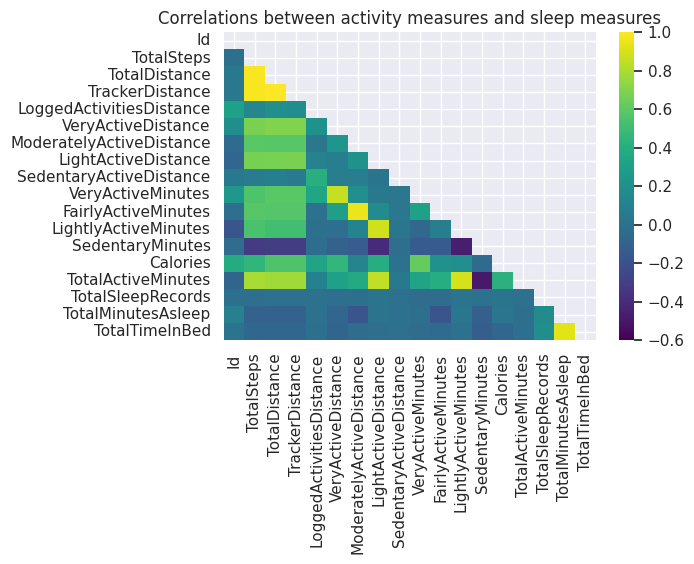

In [14]:
all_vars = pd.merge(daily_activity, sleep_day, on=['Id'])
numeric_columns = all_vars.select_dtypes(include=np.number)

correlation_matrix = numeric_columns.corr()

# Convert correlation matrix to numpy array
matrix = np.triu(correlation_matrix)

sns.set(rc={"figure.figsize": (6, 4)})
sns.set_style("darkgrid")

mps = sns.heatmap(correlation_matrix, vmin=-0.6, vmax=1, annot=False, cmap="viridis", mask=matrix).set(
    title="Correlations between activity measures and sleep measures")

**Conclusion**: the strongest correlations seem to be easily explainable. However, the relationships between sleep duration, or <code>TotalMinutesAsleep</code>, do not seem as strong aside from the pair with <code>SedentaryMinutes</code>. Further analysis is required.

## Subquestion 1: Does the time of day when a user takes the most amount of steps influence sleep duration?

Several steps need to be taken. First, the three users which were pointed out in the first exploratory question as having low average sleep durations need to be removed. Next, categories need to be created to split the hours of a day into four groups, which fall under the column <code>TimeOfDay</code>. Based on the values which appear in this column, the Wilcoxon rank-sum test is performed.

In [15]:
# Performing statistical tests
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

In [16]:
activity_sleep = pd.merge(daily_activity, sleep_day, on = ['Id'])
activity_sleep = activity_sleep.drop(columns=['SleepDay', 'TotalSleepRecords'])


In [17]:
# Removing users with suspiciously low average sleep durations
sleep_per_user = activity_sleep.groupby("Id")['TotalMinutesAsleep'].mean()
removed_users = sleep_per_user[sleep_per_user.values < 250].index
print(removed_users.values)

activity_sleep = activity_sleep[~activity_sleep['Id'].isin(removed_users.values)]
len(activity_sleep['Id'].unique())

[2320127002 4558609924 7007744171]


21

In [18]:
hourly_steps["Date"] = pd.to_datetime(hourly_steps["ActivityHour"]).dt.strftime('%m/%d/%Y')
hourly_steps["Hour"] = pd.to_datetime(hourly_steps["ActivityHour"]).dt.hour
hourly_steps = hourly_steps.join(hourly_steps.groupby(["Id", "Date"]).StepTotal.agg(["idxmax"]).set_index("idxmax"), how = "inner")

conditions = [
    (hourly_steps['Hour'] < 6),
    (hourly_steps['Hour'] >= 6) & (hourly_steps['Hour'] < 12),
    (hourly_steps['Hour'] >= 12) & (hourly_steps['Hour'] < 18),
    (hourly_steps['Hour'] >= 18)
]

values = ['Night', 'Morning', 'Afternoon', 'Evening']
hourly_steps['TimeOfDay'] = np.select(conditions, values)


In [19]:
# Making sure the date format is the same for both data sets
sleep_day['Date'] = pd.to_datetime(sleep_day['SleepDay']).dt.strftime('%m/%d/%Y')

merged_daytimes = pd.merge(hourly_steps, activity_sleep, on = ['Id'])
merged_daytimes = merged_daytimes[["Id", "Date", "TimeOfDay", "TotalMinutesAsleep"]]


In [20]:
merged_daytimes.groupby('TimeOfDay').count()


,Id,Date,TotalMinutesAsleep
TimeOfDay,,,
Afternoon,135309,135309,135309
Evening,95874,95874,95874
Morning,109218,109218,109218
Night,24937,24937,24937


In [21]:
means = merged_daytimes.groupby("TimeOfDay")['TotalMinutesAsleep'].mean()
means

TimeOfDay
Afternoon    432.259229
Evening      396.070687
Morning      441.349420
Night        434.644584
Name: TotalMinutesAsleep, dtype: float64

In [22]:
night = merged_daytimes.loc[merged_daytimes["TimeOfDay"] == "Night"]
morning = merged_daytimes.loc[merged_daytimes["TimeOfDay"] == "Morning"]
afternoon = merged_daytimes.loc[merged_daytimes["TimeOfDay"] == "Afternoon"]
evening = merged_daytimes.loc[merged_daytimes["TimeOfDay"] == "Evening"]

In [23]:
stats.ranksums(night["TotalMinutesAsleep"], morning["TotalMinutesAsleep"])

RanksumsResult(statistic=-12.028174512712578, pvalue=2.5268601712467073e-33)

In [24]:
stats.ranksums(night["TotalMinutesAsleep"], afternoon["TotalMinutesAsleep"])

RanksumsResult(statistic=4.073960614345101, pvalue=4.622030146896481e-05)

In [25]:
stats.ranksums(night["TotalMinutesAsleep"], evening["TotalMinutesAsleep"])

RanksumsResult(statistic=51.61840733694959, pvalue=0.0)

In [26]:
stats.ranksums(morning["TotalMinutesAsleep"], afternoon["TotalMinutesAsleep"])

RanksumsResult(statistic=28.30085661350412, pvalue=3.373010773117058e-176)

In [27]:
stats.ranksums(morning["TotalMinutesAsleep"], evening["TotalMinutesAsleep"])

RanksumsResult(statistic=107.13245281228814, pvalue=0.0)

In [28]:
stats.ranksums(afternoon["TotalMinutesAsleep"], evening["TotalMinutesAsleep"])

RanksumsResult(statistic=84.70370981995357, pvalue=0.0)

**Conclusion**: sleep duration significantly improves when one takes more steps during the morning as opposed to the evening. Note that the Bonferroni correction is applied, which means that alpha = 0.05/6. Therefore, the last result is also not significant.

## Subquestion 2: Which measures of a user's physical activity influence sleep duration?

Based on the modifications which were performed earlier on, the rank correlation test of Spearman can be applied straight away.

In [29]:
sc1, sp1 = spearmanr(activity_sleep['Calories'], activity_sleep['TotalMinutesAsleep'])
print("Spearman's rank correlation coefficient (Calories):", sc1)
print("p-value (Calories):", sp1)

sc2, sp2 = spearmanr(activity_sleep['TotalDistance'], activity_sleep['TotalMinutesAsleep'])
print("Spearman's rank correlation coefficient (TotalDistance):", sc2)
print("p-value (TotalDistance):", sp2)

sc3, sp3 = spearmanr(activity_sleep['LightlyActiveMinutes'], activity_sleep['TotalMinutesAsleep'])
print("Spearman's rank correlation coefficient (LightlyActiveMinutes):", sc3)
print("p-value (LightlyActiveMinutes):", sp3)

sc4, sp4 = spearmanr(activity_sleep['FairlyActiveMinutes'], activity_sleep['TotalMinutesAsleep'])
print("Spearman's rank correlation coefficient (FairlyActiveMinutes):", sc4)
print("p-value (FairlyActiveMinutes):", sp4)

sc5, sp5 = spearmanr(activity_sleep['VeryActiveMinutes'], activity_sleep['TotalMinutesAsleep'])
print("Spearman's rank correlation coefficient (VeryActiveMinutes):", sc5)
print("p-value (VeryActiveMinutes):", sp5)


Spearman's rank correlation coefficient (Calories): 0.020984630067760853
p-value (Calories): 0.02092811292887825
Spearman's rank correlation coefficient (TotalDistance): -0.13411379625454187
p-value (TotalDistance): 1.023408946575241e-49
Spearman's rank correlation coefficient (LightlyActiveMinutes): 0.08302343255727514
p-value (LightlyActiveMinutes): 5.629989267455719e-20
Spearman's rank correlation coefficient (FairlyActiveMinutes): -0.1956700971564053
p-value (FairlyActiveMinutes): 8.432049309345767e-105
Spearman's rank correlation coefficient (VeryActiveMinutes): -0.13876436756438987
p-value (VeryActiveMinutes): 3.9398641222464227e-53


**Conclusion**: The following variables significantly influence sleep duration:
- <code>TotalDistance</code>
- <code>FairlyActiveMinutes</code>
- <code>VeryActiveMinutes</code>

The following variables do not significantly influence sleep duration:
- <code>Calories</code>
- <code>LightlyActiveMinutes</code>

It must be noted that for some variables, like calories, there might complex/non-linear relationship at play which are not captured by this test.

## Subquestion 3: How accurately can sleep duration be predicted based on measurements of a user's physical activity?

The first step is to determine the feature importance of the measurements. Based on the results, models were compared to each other based on the RMSE score.

In [30]:
# Implementing ML models
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [31]:
X = activity_sleep[["Calories", "TotalSteps", "TotalDistance", "TotalActiveMinutes",
                    "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]]
y = activity_sleep['TotalMinutesAsleep']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importance_tiers = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_tiers = importance_tiers.sort_values(by = 'Importance', ascending = False)
print(importance_tiers)


                Feature  Importance
0              Calories    0.427926
5   FairlyActiveMinutes    0.147465
1            TotalSteps    0.098075
4  LightlyActiveMinutes    0.091726
2         TotalDistance    0.087928
3    TotalActiveMinutes    0.075912
6     VeryActiveMinutes    0.070967


**Conclusion:** Based on the random forest model, the feature importance of the variable <code>Calories</code> is the most significant predictor for the sleep duration. It must be noted that sedentary minutes would be a stronger predictor, but due to the results of the data analysis shown earlier, this variable was not considered.

In [33]:
target = "TotalMinutesAsleep"
feature_column = "Calories"

To implement the machine learning algorithms, we first used grid search to search for hyperparamter tuning/cross-validation and choose the parameters with the lowest RMSE score on the training set for the final prediction.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    activity_sleep[feature_column].values.reshape(-1, 1),
    activity_sleep[target],
    test_size=0.2,
    random_state=42
)

linear_model = LinearRegression()
linear_grid = [{ "n_jobs": [1,2,3,4,5,6,7]}]
linear_search = GridSearchCV(linear_model, linear_grid)
linear_search.fit(X_train, y_train)
final_linear = linear_search.best_estimator_
linear_predictions = final_linear.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
# Hyperparameters for linear regression: n_jobs=1

svm_model = SVR()
SVR_grid = [{"kernel": ["linear", "poly", "rbf", "sigmoid"], "degree":[1,2,3,4,5]}]
svm_search = GridSearchCV(svm_model, SVR_grid)
svm_search.fit(X_train, y_train)
final_svm = svm_search.best_estimator_
svm_predictions = final_svm.predict(X_test)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
# Hyperparameters for SVR: degree=1

knn_model = KNeighborsRegressor()
knn_grid = [{"n_neighbors":[3,4,5,6,7], "weights":["uniform", 'distance']}]
knn_search = GridSearchCV(knn_model, knn_grid)
knn_search.fit(X_train, y_train)
final_knn = knn_search.best_estimator_
knn_predictions = final_knn.predict(X_test)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
# Hyperparameters for KNN: n_neighbors=7

dt_model = DecisionTreeRegressor(random_state=42)
dt_grid = [{"criterion":["squared_error"], "splitter":['best','random'], 'min_samples_split':[2,3,4]}]
dt_search = GridSearchCV(dt_model, dt_grid)
dt_search.fit(X_train, y_train)
final_dt = dt_search.best_estimator_
dt_predictions = final_dt.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
# Hyperparameters for Decision Tree: min_samples_split=4, splitter='random'

rf_model = RandomForestRegressor(random_state=42)
rf_grid = [{'n_estimators':[60,80,100,120,150],'criterion':['squared_error']}]
rf_search = GridSearchCV(rf_model, rf_grid)
rf_search.fit(X_train, y_train)
final_rf = rf_search.best_estimator_
rf_predictions = final_rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
# Hyperparameters for Random Forest: n_estimators=150, random_state=42

print("Hyperparameters:\n")
print(final_linear)
print(final_svm)
print(final_knn)
print(final_dt)
print(final_rf,"\n")

print(f"Metrics for TotalMinutesAsleep:\n")
print("Linear Regression RMSE:", linear_rmse)
print("SVM RMSE:", svm_rmse)
print("KNN RMSE:", knn_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)

**Conclusion**: When utilizing the daily calories burned as the independent variable to predict the total minutes asleep, the computed RMSE is found to be the lowest with the implementation of linear regression. The support vector machine (SVM) also performs well and exhibits a comparable RMSE.